# J0815 lightcurve analysis

Announced by ASAS-SN on Twitter, on their transients page at: http://www.astronomy.ohio-state.edu/asassn/transients.html

Light curve at:

https://asas-sn.osu.edu/sky-patrol/coordinate/c4765b75-bfa4-4fc6-9d3a-9b3d11555506



In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from astropy.io import ascii
from astropy import constants as c
from astropy import units as u
from kepler3 import *

In [91]:
t = ascii.read('light_curve_c4765b75-bfa4-4fc6-9d3a-9b3d11555506.csv')

# just look at the g band

tg = t[(t['Filter']=='g') * (t['flux_err'] < 0.5)]

In [92]:
mjd = tg['HJD']-2400000.
print(mjd)


       HJD        
------------------
58282.474160000216
 58282.47538000019
 58282.47660000017
 58284.47838999983
58284.479609999806
 58284.48082000017
 58285.47556999978
58289.463680000044
 58289.46490000002
 58289.46613000007
               ...
59388.462150000036
59388.463390000165
 59390.46289000008
 59392.46817999985
59392.469430000056
 59394.45403000014
  59394.4552699998
 59394.45650999993
59452.915450000204
 59452.91667000018
59452.917929999996
Length = 1883 rows


<IPython.core.display.Javascript object>


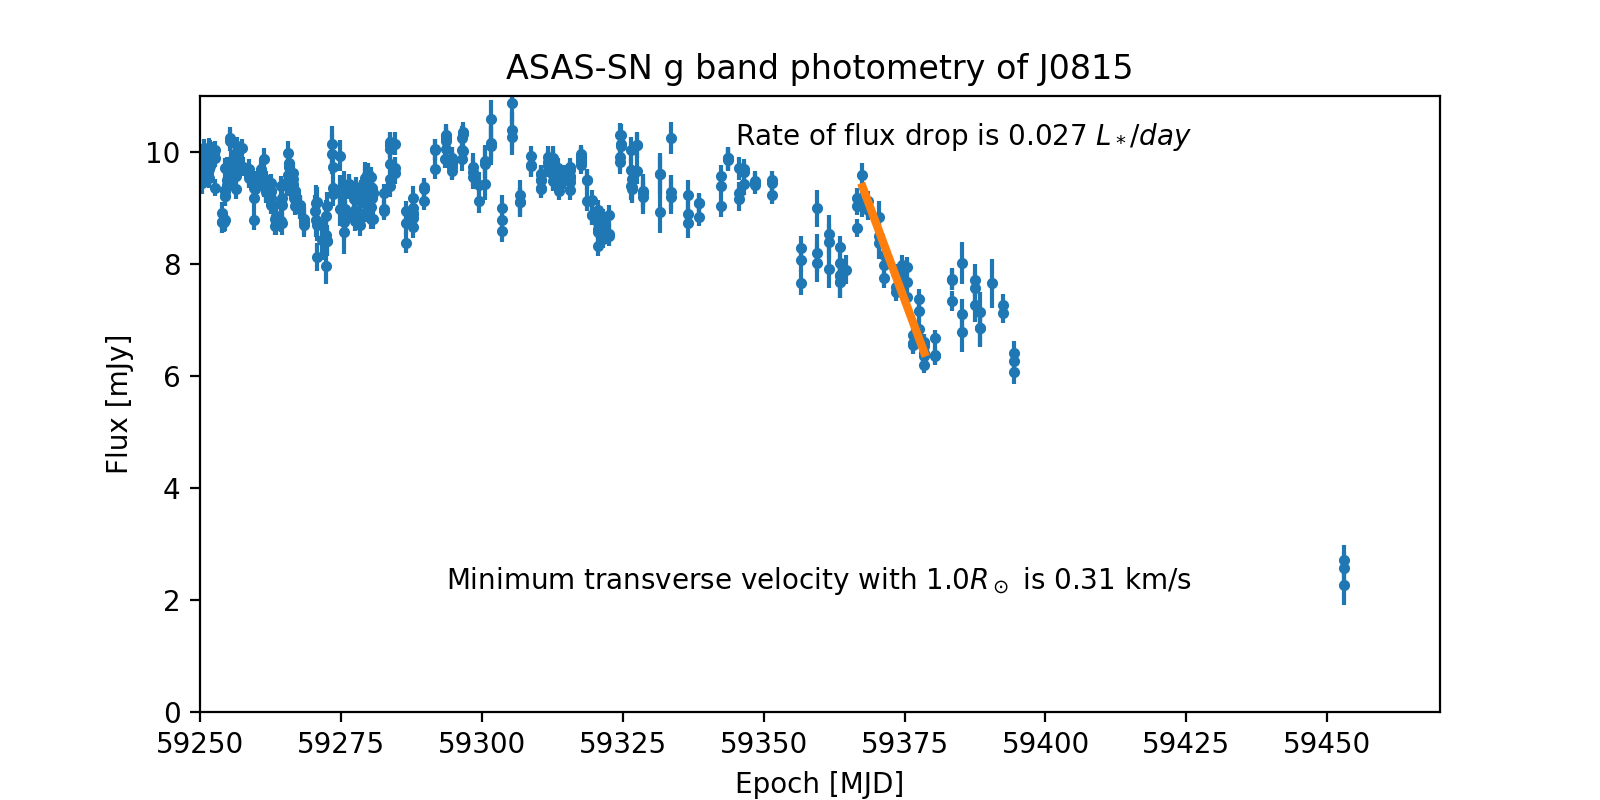

0.3107456601575111


Text(0.8, 0.2, 'Minimum transverse velocity with 1.0$R_\\odot$ is 0.31 km/s')

In [93]:
fi, ax = plt.subplots(1,1,figsize=(8,4))

#ax.plot(t['HJD']-2450000., t['mag'],yerr=t['mag_err'])
ax.errorbar(mjd, tg['flux(mJy)'],yerr=tg['flux_err'],fmt='.')
ax.set_xlim(59250,59470)
ax.set_ylim(0,11)
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('Flux [mJy]')
ax.set_title('ASAS-SN g band photometry of J0815')

# by eye... forgive me for I know not what I have done.

t1 = 59367.56 
f1 = 9.374
t2 = 59378.5
f2 = 6.419

ax.plot((t1,t2),(f1,f2),linewidth=3,zorder=10)

f_norm = 10.

df = (f1-f2)/f_norm
dt = t2-t1

dfdt = df/dt
tx = 'Rate of flux drop is {:.3f} $L_*/day$'.format(dfdt)
ax.text(0.8, 0.92, tx, ha='right',transform=ax.transAxes)

def dxdtmin (ldot,rstar): # equation 12 from van Werkhoeven 2014 MNRAS 441 2845
    vmin = 13 * ldot * rstar / 1.13
    return vmin # km/s

print(dxdtmin(dfdt,1.0))
t4 = r'Minimum transverse velocity with 1.0$R_\odot$ is {:.2f} km/s'.format(dxdtmin(dfdt,1.0))

ax.text(0.8, 0.2, t4, ha='right',transform=ax.transAxes)


In [97]:
P_orb = Pgivenm1m2vcirc(1.0*u.Msun, 1.0 * u.Mjup, 0.310 * u.km/u.s)
print(P_orb)

887803.455495389 yr


In [98]:
d_obj = (100 * u.day * 0.310 * (u.km / u.s)).to(u.au)
d_obj

<Quantity 0.017904 AU>